In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
m = 1.67e-27 # mass
q = 1.6e-19  # charge
E = 1000     #N/C in the positive y direction
vx = 4.0e1   # m/s in xdirection
B = -2.0e-3   # Tesla
vy=0.0
a = q*(E-vx*B)/m

t = np.linspace(0,0.5,25000)
def harm(x,t):
    y = x[1]
    v = -x[0]
    return [y,v]

def eqns(x,t,m,q,E,B):
    dy1 = x[2]
    dy2 = x[3]
    dy3 = q*(x[3]*B)/m
    dy4 = q*(E-x[2]*B)/m
    return [dy1,dy2,dy3,dy4]

def velsel(E,B=1.0e-7,q=1.6e-19,m=1.67e-27,vx=1.0e2):
    
    #E = np.abs(1.0e1*B)
    vy=0.0
    ax = plt.figure()
    y0 = [0.0,5.,vx,vy]
    args=(m,q,E,B)
    sol = odeint(eqns, y0, t,args)
    #ax.axis([0,10,0,10])
    _ = plt.plot(sol[:,0],sol[:,1])
    _ = plt.axis([0,10,0,10])
    _ = plt.title("E = " + str(E))
    #plt.plot(t,sol[:,1])
    _ = plt.grid()
    xarrow=np.linspace(0.5,9.5,9)
    for coord in xarrow:
        _ = plt.arrow(coord, 0.2, 0, 9, head_width=0.25, head_length=0.75, fc='b', ec='b')
    _ = plt.annotate("E", xy=(2, 1), xytext=(8.5, 5),color='b',size=20)

    return ax


    


# Velocity Selector


## Lorentz force law

A charge, q, moving through a region with velocity, $\mathbf{v}$,  with an electric field, $\mathbf{E}$ and magnetic field, $\mathbf{B}$, experiences a force given by 

$$
\mathbf{F} = q \;(\mathbf{E} + \mathbf{v}\times\mathbf{B})
$$

Consider a region in space with a uniform electric field, $\mathbf{E} = E \;\hat{\mathbf{\jmath}}$.  A proton enters this region of space with velocity $\mathbf{v} = v\;\hat{\imath}$.

There is also an uniform magnetic field perpendicular to the screen.


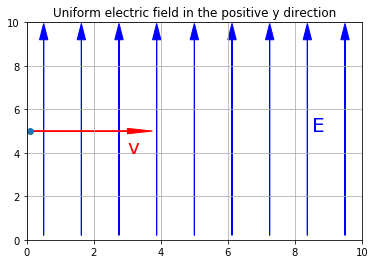

In [8]:

#plt.axes().set_aspect('equal')
plt.axis([0,10,0,10])

plt.grid()
xarrow=np.linspace(0.5,9.5,9)
for coord in xarrow:
    plt.arrow(coord, 0.2, 0, 9, head_width=0.25, head_length=0.75, fc='b', ec='b')
plt.arrow(0.,5,3.0,0, head_width=0.25, head_length=0.75, fc='r', ec='r')
plt.annotate('E', xy=(2, 1), xytext=(8.5, 5),color='b',size=20)
plt.plot(0.1,5,'o')
plt.annotate('v', xy=(2, 1), xytext=(3, 4),color='r',size=20)

plt.title('Uniform electric field in the positive y direction')
plt.show()

### Example 
Here is an example of a charge entering the region where the electric force is less than the magnetic force.

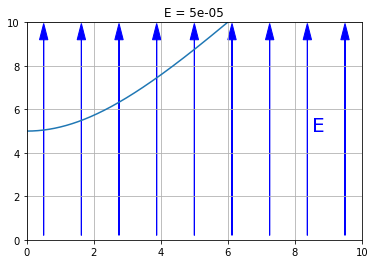

In [3]:
f = velsel(0.5e-4)
plt.show()



Now we have the electric force and magnetic force equaling each other.  This means the charge is able to go straight through.

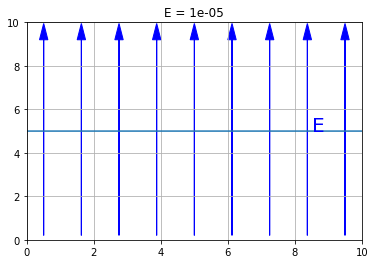

In [4]:
g = velsel(1.0e-5)
plt.show()


Now the electric force is less than the  magnetic force. 

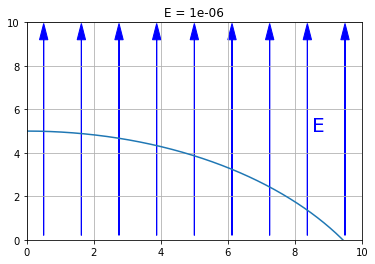

In [5]:
h = velsel(1.0e-6)
plt.show()


### Exercises

1) If the above charge is a proton, could you determine the direction of the magnetic field?

2) Find the Electric field required to have a proton travel through this region in a straight line if the magnetic field has magnitude 30 $\mu$T and has an initial speed of $1.0x10^{4}$ m/s.